In [1]:
import numpy as np
import netCDF4 as nc
from glob import glob
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
% matplotlib inline

In [2]:
filename = glob('_data/ATSC-500/case_60_10.nc')[0]

In [3]:
nc_obj = nc.Dataset(filename)
# Get vertical coord
z = nc_obj.variables['z'][...]
time = nc_obj.variables['time'][...]
# Get group names
nc_gps = list(nc_obj.groups.keys())
# The key and dim of vars are the same in all the gps
shape_grid = nc_obj[nc_gps[0]].variables['TABS'].shape
# Add the number of gps into the shape
shape_all = (len(nc_gps),) + shape_grid
W = np.zeros(shape_all)*np.nan
TABS = np.zeros(shape_all)*np.nan
# loop over all the groups
for i in range(len(nc_gps)):
    W[i, ...] = nc_obj[nc_gps[i]].variables['W'][...]
    TABS[i, ...] = nc_obj[nc_gps[i]].variables['TABS'][...]
# ...
nc_obj.close()

## Show the vertical profile of domain-wide averaged buoyancy flux

In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
W1 = W[0, ...]
TABS1 = TABS[0, ...]
Fb_ave = ((W1 - W1.mean(0))*(TABS1 - TABS1.mean(0))).mean((2, 3))
GridZ, GridT = np.meshgrid(z, time)
L = len(time)
ztop = np.zeros(L)
for i in range(L):
    ztop[i] = z[np.flipud(np.cumsum(np.abs(Fb_ave[i, ::-1]))) < 0.1].min()
fake_x = np.zeros(L)

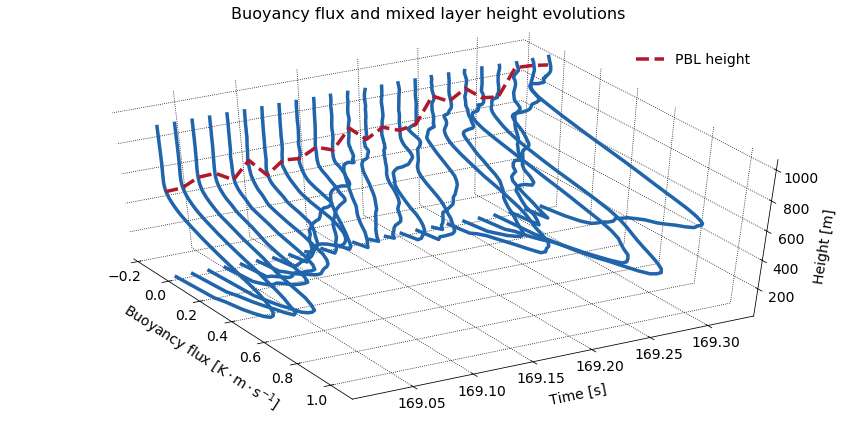

In [6]:
B = plt.cm.RdBu(255-25)
R = plt.cm.RdBu(25)
# plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
ax.grid(linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.zaxis.set_tick_params(labelsize=14)
ax.xaxis._axinfo["grid"]['linestyle'] = ':'
ax.yaxis._axinfo["grid"]['linestyle'] = ':'
ax.zaxis._axinfo["grid"]['linestyle'] = ':'
ax.xaxis._axinfo["grid"]['color'] = 'k'
ax.yaxis._axinfo["grid"]['color'] = 'k'
ax.zaxis._axinfo["grid"]['color'] = 'k'
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xlabel('\n\nBuoyancy flux [$\mathrm{K\cdot m\cdot s^{-1}}$]', fontsize=14)
ax.set_ylabel('\n\nTime [s]', fontsize=14)
ax.set_zlabel('\nHeight [m]', fontsize=14)
ax.set_title('Buoyancy flux and mixed layer height evolutions', fontsize=16, y=1.075)
ax.set_xlim3d([-0.2, 1.1])
ax.set_ylim3d([time[0], time[L-1]])
for i in range(0, L, 2):
    ax.plot(Fb_ave[i, :], GridT[i, :], GridZ[i, :], color=B, lw=3.5)
ax.plot(fake_x[::2], time[::2], ztop[::2], ls='--', color=R, lw=3.5, label='PBL height')
LG = ax.legend(bbox_to_anchor=(0.9, 0.95), prop={'size':14}); LG.draw_frame(False)
ax.view_init(45, -30)
plt.tight_layout()

## Verify if the height growing as $\sqrt{\mathrm{time}}$

In [7]:
secs = time-time[0]
k, b = np.polyfit(np.sqrt(secs), ztop, 1)

Text(0.15,600,'y = 693.89 $\\sqrt{t}$ +517.96')

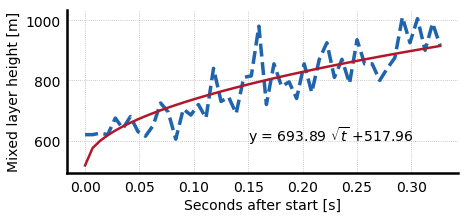

In [9]:
fig = plt.figure(figsize=(7, 3))
ax = fig.gca()

ax.grid(linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
[j.set_linewidth(2.5) for j in ax.spines.values()]
ax.tick_params(axis="both", which="both", bottom="off", top="off", \
    labelbottom="on", left="off", right="off", labelleft="on")
ax.set_xlabel('Seconds after start [s]', fontsize=14)
ax.set_ylabel('Mixed layer height [m]', fontsize=14)

ax.plot(secs, ztop, '--', lw=3.5, color=B)
ax.plot(secs, k*np.sqrt(secs)+b, ls='-', lw=2.5, color=R)
ax.text(0.15, 600, 'y = '+str(np.around(k, 2))+' $\sqrt{t}$ +'+str(np.around(b, 2)), fontsize=14)